# The Covid_19 tweet Sentiment Analysis


## Purpose
Natural language processing has gained wide range of importance with the large amount of data available (on social media, web pages, email). It is of utmost importance to extract valuable information from textual data such as this one is mined from Twitter. There are an assortment of data manipulation, data analysis, data visuslization etc. techniques used to accomplish this task.

## About
The covid-19 twitter dataset contains tweets mined from twitter that shows the engagement of people around the world tweeting about the Covid-19 pandemic.

This notebook contains analytics and insight to the NLP problem and we will see what insights from the dataset can help to  understand the data better.

My approach to this project is to show salient important information that can be extracted from the dataset which is culled from mentions, region of tweet, sentiment to region etc.

In [1]:
#importing libraries 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [4]:
#loading the dataset from my local disk

train_set = pd.read_csv("../input/covid-19-nlp-text-classification/Corona_NLP_train.csv", encoding="ISO-8859-1")
test_set = pd.read_csv("/kaggle/input/covid-19-nlp-text-classification/Corona_NLP_test.csv", encoding="ISO-8859-1")


In [5]:
import tensorflow as tf

## Exploratory Data Analysis

In [6]:
train_set.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [8]:
train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
UserName         41157 non-null int64
ScreenName       41157 non-null int64
Location         32567 non-null object
TweetAt          41157 non-null object
OriginalTweet    41157 non-null object
Sentiment        41157 non-null object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [9]:
train_set.isnull().sum()

UserName            0
ScreenName          0
Location         8590
TweetAt             0
OriginalTweet       0
Sentiment           0
dtype: int64

In [10]:
test_set.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [11]:
test_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3798 entries, 0 to 3797
Data columns (total 6 columns):
UserName         3798 non-null int64
ScreenName       3798 non-null int64
Location         2964 non-null object
TweetAt          3798 non-null object
OriginalTweet    3798 non-null object
Sentiment        3798 non-null object
dtypes: int64(2), object(4)
memory usage: 178.1+ KB


In [12]:
test_set.isnull().sum()

UserName           0
ScreenName         0
Location         834
TweetAt            0
OriginalTweet      0
Sentiment          0
dtype: int64

## Tweet Place(Location of Tweets) to the count of tweets

In [13]:
#count of tweets froom various locations
train_set.Location.value_counts(dropna=False)[:20]

NaN                        8590
London                      540
United States               528
London, England             520
New York, NY                395
Washington, DC              373
United Kingdom              337
Los Angeles, CA             281
India                       268
UK                          232
Australia                   225
USA                         223
England, United Kingdom     191
Canada                      191
Toronto, Ontario            160
Global                      159
Chicago, IL                 155
California, USA             153
San Francisco, CA           152
Boston, MA                  150
Name: Location, dtype: int64

In [14]:
train_set.Location = train_set.Location.str.split(",").str[0]

Text(0, 0.5, 'Place')

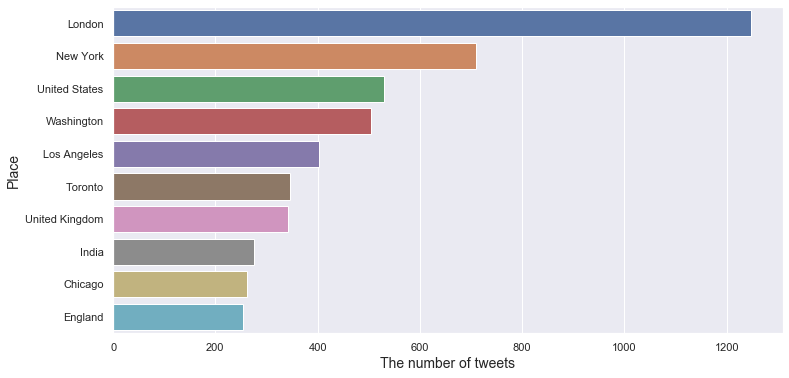

In [15]:
#plotting tweet per location
sns.set_style("whitegrid")
sns.set(rc={'figure.figsize':(11,4)})

plt.figure(figsize=(12,6))
sns.barplot(train_set["Location"].value_counts().values[:10], train_set["Location"].value_counts().index[:10]);
plt.xlabel("The number of tweets",fontsize=14)
plt.ylabel("Place",fontsize=14)

In [16]:
#we count  the sentiment
train_set['Sentiment'].value_counts() 

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

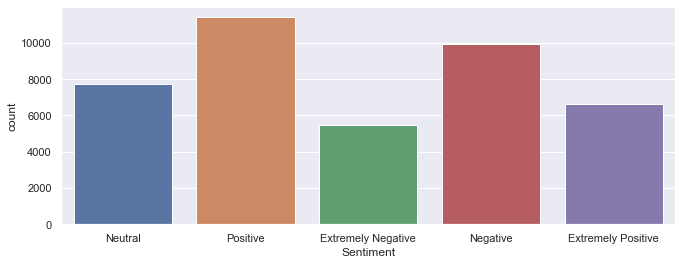

In [17]:
#plot sentiment
sns.countplot(x = "Sentiment", data = train_set)

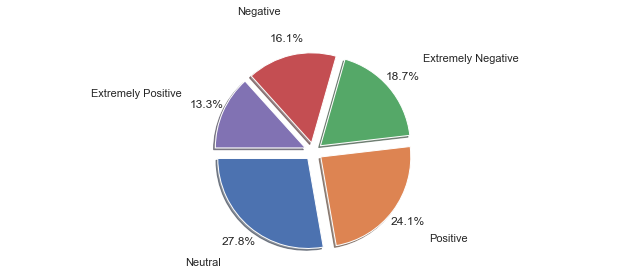

In [18]:
#pull to a pie chart
plt.pie(train_set['Sentiment'].value_counts(),labels=(train_set['Sentiment'].unique()), explode = [0.1,0.1,0.1,0.1,.1],autopct ='%1.1f%%',shadow = True, startangle = 180, labeldistance = 1.5, pctdistance =1.2)

plt.axis('equal')
plt.show()

## One Hot Encoding

I one hotencode the sentiment{label} into negative positive and neutral to range between 0 and 2

In [19]:
#here I encoded sentiment text into just negative, positive and neutral
encoded_label = {'Extremely Negative': 0,'Negative': 0,'Neutral': 1,'Positive':2,'Extremely Positive': 2}
labels = ['Negative', 'Neutral', 'Positive']

In [20]:
train_set["Sentiment"].replace(encoded_label, inplace=True)
test_set["Sentiment"].replace(encoded_label, inplace=True)

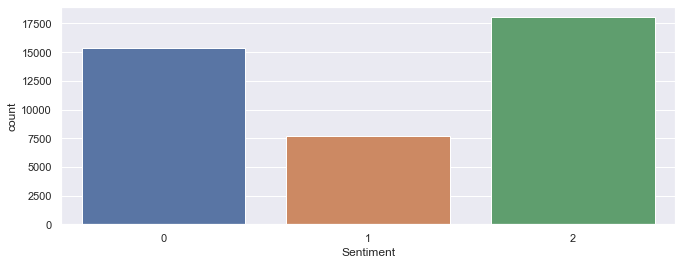

In [21]:
#plottin the sentiment count againstt the train_set

sns.countplot(x = "Sentiment", data = train_set)

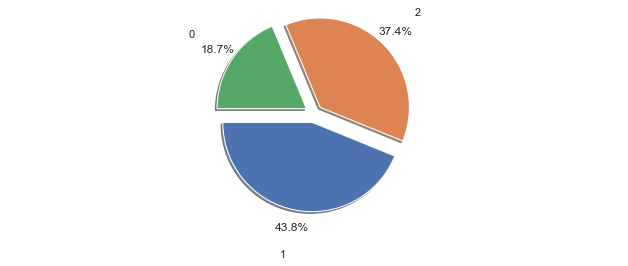

In [22]:
#pulling to a pie chart
plt.pie(train_set['Sentiment'].value_counts(),labels=(train_set['Sentiment'].unique()), explode = [0.1,0.1,.1],autopct ='%1.1f%%',shadow = True, startangle = 180, labeldistance = 1.5, pctdistance =1.2)

plt.axis('equal')
plt.show()

In [23]:
#sentiment of each location
senti_loctn = train_set.iloc[:, [2,5]]

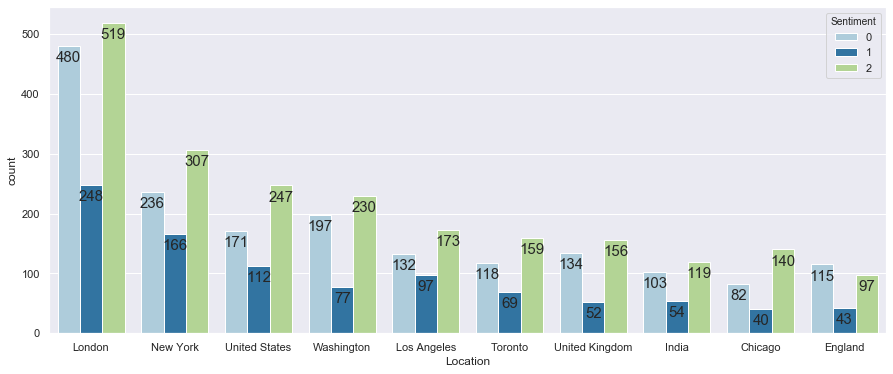

In [24]:
#Here I try to plot the various encoded sentiment for various location which will give insight on how much posiive,negative or neutral the tweet from such location is

plt.figure(figsize=(15, 6))
sns_horiz = sns.countplot(x = "Location", hue = "Sentiment", data = senti_loctn, 
              order = train_set.Location.value_counts()[:10].index, orient = "h", palette = "Paired") 

for bits in sns_horiz.patches:
    sns_horiz.annotate(format(bits.get_height(), '.0f'), 
                   (bits.get_x() + bits.get_width() / 2., bits.get_height()), 
                   ha = 'center', va = 'center', 
                   size=15,
                   xytext = (0, -12), 
                   textcoords = 'offset points')
plt.show()

In [25]:
#analysis of the day of the week tweet
#This is to proffer insight on how much people tweet per day of the week

train_set["TweetAt"] = pd.to_datetime(train_set["TweetAt"])
train_set["day"] = train_set["TweetAt"].apply(lambda x : x.dayofweek)
dmap = {0: 'Mon', 1: 'Tue', 2:'Wed', 3: 'Thu', 4: 'Fri', 5: 'Sat', 6: 'Sun'}

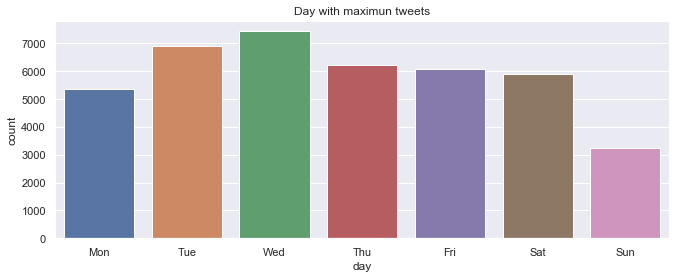

In [26]:
train_set["day"] = train_set["day"].map(dmap)
plt.title("Day with maximun tweets")
sns.countplot(train_set["day"])

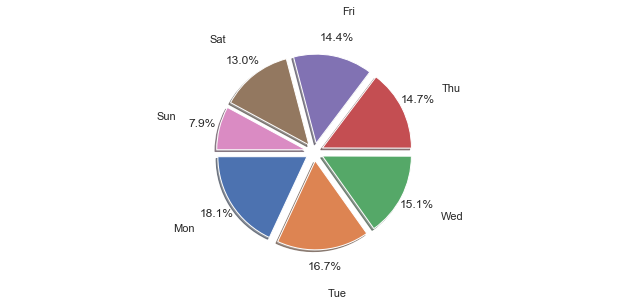

In [27]:
#plot on a pie chart
plt.pie(train_set['day'].value_counts(),labels=(train_set['day'].unique()), explode = [0.1,0.1,0.1,0.1,.1,0.1,0.1],autopct ='%1.1f%%',shadow = True, startangle = 180, labeldistance = 1.5, pctdistance =1.2)

plt.axis('equal')
plt.show()

# TWITTER MENTIONS

In [28]:
import regex as reg
# regex will be used to search for @ mentions as this is used in twitter to mention individuals

In [29]:
from collections import Counter

In [30]:
# The function below uses regex to find text that begins with @mention from the original tweet column
def tweet_mentions(m):
    twt_mentions = reg.findall("(?<![@\w])@(\w{1,25})", m)
    return " ".join(twt_mentions)
train_set['mentions'] = train_set['OriginalTweet'].apply(lambda x : tweet_mentions(x))

In [31]:
read_mentions = list(train_set[(train_set['mentions'] != None) & (train_set['mentions'] != "")]['mentions'])
read_mentions = [tag.lower() for tag in read_mentions]
mentions_set = dict(Counter(read_mentions))
most_mentions_set = pd.DataFrame(list(mentions_set.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[:15]
most_mentions_set.head()

word  count
32   realdonaldtrump    129
49           youtube     74
408            tesco     66
62            amazon     63
37      borisjohnson     62

In [32]:
#For the least mentioned people can be sorted by getting the least of the mentions
Least_mentions_set = pd.DataFrame(list(mentions_set.items()),columns = ['word','count']).reset_index(drop=True).sort_values('count',ascending=False)[15:]
Least_mentions_set.head()

word  count
262  morrisons     22
525    abcnews     21
147        cnn     21
629       ebay     20
139       asda     20

In [33]:
import plotly.express as px

In [34]:
#the plot here is to show insight on the level of mentions of various individuals

fig = px.bar(x=most_mentions_set['word'],y=most_mentions_set['count'],
       orientation='v',
       color=most_mentions_set['word'],
       text=most_mentions_set['count'],
       color_discrete_sequence= px.colors.qualitative.Bold)

fig.update_traces(texttemplate='%{text:.2s}', 
                  textposition='outside', 
                  marker_line_color='rgb(8,48,107)', 
                  marker_line_width=1.5, 
                  opacity=0.7)

fig.update_layout(width=1000, 
                  showlegend=False, 
                  xaxis_title="Twitter mentions",
                  yaxis_title="Count",
                  title="Top @mentions in general Covid-19 Tweets")
fig.show()

# Data Preprocessing

In [35]:
train_set.drop("day", axis = 1, inplace = True)

In [36]:
train_set.drop_duplicates(inplace = True)
test_set.drop_duplicates(inplace = True)

In [37]:
#save data dropped

train_set_check = train_set.copy()
test_set_check = test_set.copy()

As you can see, we may or may not have embeddings for all the words and especially emojis and nowdays, emojis are really popular. It is therefore good pratice to develop ones embeddings as it will have better coverage. 
One more thing is that you could use the pretrained embeddings and then just finetune them. 
Also its good to show the beautiful thing about tweet_tokenizer of nltk.

In [38]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem.wordnet import WordNetLemmatizer
import re

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer
from nltk.tokenize import TweetTokenizer

In [40]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [41]:
sentences = train_set['OriginalTweet'][:5]

for i in sentences[3:4]:
    print("Original:\n")
    print(i)
    print('\nTensorflow Tokenizer\n:')
    a = Tokenizer()
    a.fit_on_texts([i])
    print(a.word_index)
    print("\nTweet Tokenizer:\n")
    print(TweetTokenizer().tokenize(i))
    print('\nNLTK word_tokenizer:\n')
    print(word_tokenize(i))

Original:






#COVID19france #COVID_19 #COVID19 #coronavirus #confinement #Confinementotal #ConfinementGeneral https://t.co/zrlG0Z520j

Tensorflow Tokenizer
:
{'\r\r': 1, 'food': 2, 'is': 3, 'not': 4, 'you': 5, 'stay': 6, 'my': 7, 'stock': 8, 'the': 9, 'only': 10, 'one': 11, 'which': 12, 'empty': 13, 'please': 14, "don't": 15, 'panic': 16, 'there': 17, 'will': 18, 'be': 19, 'enough': 20, 'for': 21, 'everyone': 22, 'if': 23, 'do': 24, 'take': 25, 'more': 26, 'than': 27, 'need': 28, 'calm': 29, 'safe': 30, 'covid19france': 31, 'covid': 32, '19': 33, 'covid19': 34, 'coronavirus': 35, 'confinement': 36, 'confinementotal': 37, 'confinementgeneral': 38, 'https': 39, 't': 40, 'co': 41, 'zrlg0z520j': 42}

Tweet Tokenizer:

['My', 'food', 'stock', 'is', 'not', 'the', 'only', 'one', 'which', 'is', 'empty', '...', 'PLEASE', ',', "don't", 'panic', ',', 'THERE', 'WILL', 'BE', 'ENOUGH', 'FOOD', 'FOR', 'EVERYONE', 'if', 'you', 'do', 'not', 'take', 'more', 'than', 'you', 'need', '.', 'Stay', 'calm',

## Tweets Cleaning

In [42]:
stop_words = stopwords.words('english')
lem = WordNetLemmatizer()

def Data_cleaning(data):
    # Here urls are removed 
    tweet_without_url = re.sub(r'http\S+', ' ', data)
    
    # hashtags are removed here
    tweet_without_hashtag = re.sub(r'#\w+',' ', tweet_without_url)
    
    # Remove unknown characters and emojis
    tweet_without_mentions = re.sub(r'@\w+',' ', tweet_without_hashtag)
    precleaned_tweet = re.sub('[^A-Za-z]+', ' ', tweet_without_mentions)

    # tensorflow Tokenizer
    tweet_tokens = TweetTokenizer().tokenize(precleaned_tweet)
    
    # Punctuation Removal
    tokens_without_punc = [w for w in tweet_tokens if w.isalpha()]
    
    # Removing Stopwords
    tokens_without_sw = [t for t in tokens_without_punc if t not in stop_words]
    
    # Lemmatizing
    text_cleaned = [lem.lemmatize(t) for t in tokens_without_sw]
    
    
    return " ".join(text_cleaned)

In [43]:
#Here i used the Data_Cleaning function to clean the tweets 
train_set_check['OriginalTweet'] = train_set_check['OriginalTweet'].apply(lambda x: Data_cleaning(x))

In [44]:
#Here we can see how the cleaned tweets look

pd.set_option('display.max_colwidth', -1)  
train_set_check.iloc[:, [4,5]].head()

OriginalTweet  \
0                                                                                                                                                                                              
1  advice Talk neighbour family exchange phone number create contact list phone number neighbour school employer chemist GP set online shopping account po adequate supply regular med order   
2  Coronavirus Australia Woolworths give elderly disabled dedicated shopping hour amid COVID outbreak                                                                                          
3  My food stock one empty PLEASE panic THERE WILL BE ENOUGH FOOD FOR EVERYONE take need Stay calm stay safe                                                                                   
4  Me ready go supermarket outbreak Not I paranoid food stock litteraly empty The serious thing please panic It cause shortage                                                                 

   Sentiment  
0  1          
1  2          
2  2          
3  2          
4  0

In [45]:
#Test data also is cleaned
test_set_check['OriginalTweet'] = test_set_check['OriginalTweet'].apply(lambda x: Data_cleaning(x))

In [46]:
pd.set_option('display.max_colwidth', -1)  
test_set_check.iloc[:, [4,5]].head()

OriginalTweet  \
0  TRENDING New Yorkers encounter empty supermarket shelf pictured Wegmans Brooklyn sold online grocer FoodKick MaxDelivery fearing shopper stock   
1  When I find hand sanitizer Fred Meyer I turned But pack Purell Check concern driving price                                                       
2  Find protect loved one                                                                                                                           
3  buying hit City anxious shopper stock food amp medical supply worker becomes st confirmed patient OR staged event                                
4  One week everyone buying baby milk powder next everyone buying toilet paper                                                                      

   Sentiment  
0  0          
1  2          
2  2          
3  0          
4  1

# Count word usage in Tweets

It is neccessary to account for the names of items mostly used in any NLP problem such as this. This knowlege helps to understand the basic needs of most people or how it is important in their daily lives.

In [47]:
# Here i used counter to count the words that are available and cast the most top 10 common words
from collections import Counter
count_most_word = Counter()
for text in test_set_check["OriginalTweet"].values:
    for word in text.split():
        count_most_word[word] += 1
        
count_most_word.most_common(10)

[('I', 1442),
 ('food', 1238),
 ('store', 1170),
 ('grocery', 819),
 ('stock', 712),
 ('people', 697),
 ('amp', 610),
 ('supermarket', 517),
 ('shopping', 481),
 ('price', 457)]

In [48]:
# get_number_words function serves to set the frequency of such words counted by Counter in the bag_of_words

def get_number_words(corpus, direction, n):
    vec = CountVectorizer().fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    if direction == "top":
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    else:
        words_freq =sorted(words_freq, key = lambda x: x[1], reverse=False)
    return words_freq[:n]

In [49]:
#Common words tops the first 15 and rare words lasts on the list
from sklearn.feature_extraction.text import CountVectorizer
common_words = get_number_words(test_set_check["OriginalTweet"], "top", 15)
rare_words = get_number_words(test_set_check["OriginalTweet"], "bottom", 15)

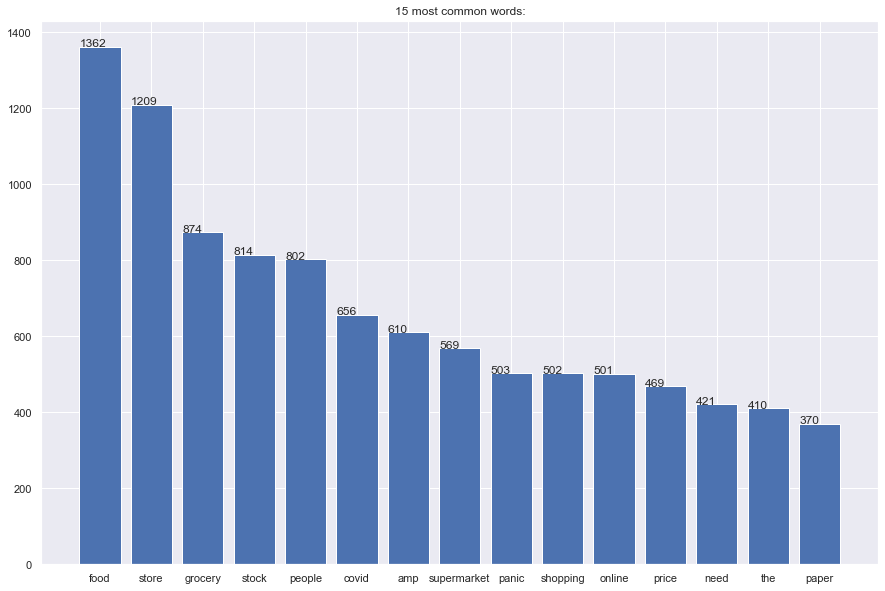

In [50]:
common_words = dict(common_words)
names = list(common_words.keys())
values = list(common_words.values())
plt.subplots(figsize = (15,10))
bars = plt.bar(range(len(common_words)),values,tick_label=names)
plt.title('15 most common words:')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x(), yval + .01, yval)
plt.show()

# WORDCLOUD: REPETITION OF WORDS

In [53]:
from wordcloud import WordCloud

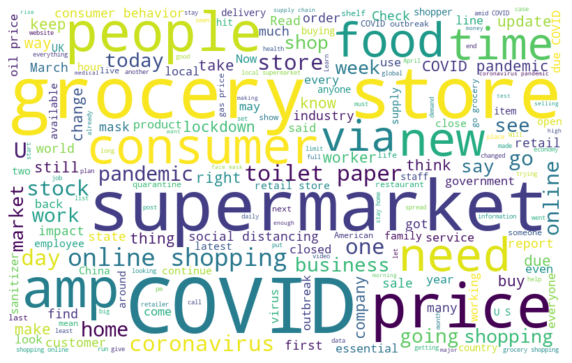

In [54]:
# Positive sentiment words on the word cloud and plotted
words_positive = ' '.join([tweet for tweet in train_set_check['OriginalTweet'][train_set_check['Sentiment'] == 1]])

wordcloud = WordCloud(background_color = "white",width = 800, height = 500,
                      random_state = 21, max_font_size = 110).generate(words_positive)
plt.figure(figsize = (10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

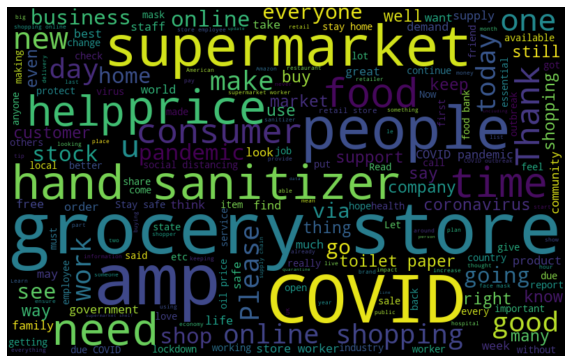

In [55]:
# nNegative sentiment words on the word cloud and plotted

words_negative = ' '.join([tweet for tweet in train_set_check['OriginalTweet'][train_set_check['Sentiment'] == 2]])

wordcloud = WordCloud(width = 800, height = 500, random_state = 21, max_font_size = 110).generate(words_negative)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

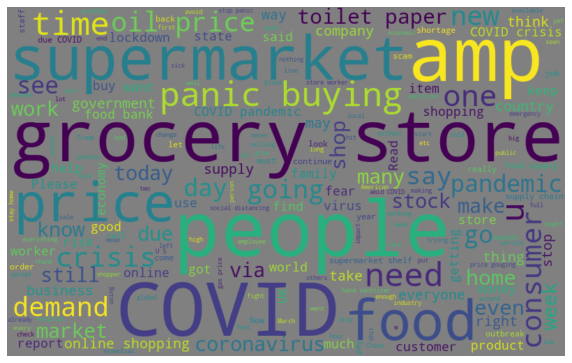

In [56]:
# Neutral sentiment words on the word cloud and plotted
words_neutral = ' '.join([tweet for tweet in train_set_check['OriginalTweet'][train_set_check['Sentiment'] == 0]])

wordcloud = WordCloud(background_color = "grey", width = 800, height = 500, random_state = 21, max_font_size = 110).generate(words_neutral)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

# Discussion

The importance of Exploratory Data Analysis (EDA) cannot be overemphasized in  data  analysis and its ability to help explore the data in full form as shown in the report  which makes creating of insight according to the research questions easy to actualize. 

The insight discused and shown above allows informations like:

<b>The most mentioned individual</b>: which gives insight on how involved certain individuals are in one way or the other with happenings or controversies surrounding the pandemic.

<b>Tweets count according to location</b>: this helps to understand how much people tweet about covid-19 in certain locations as this can prove how much the pandemic has affected them. From this insight, it is quite obvious that people in London tweeted most about the pandemic followed by other places.

<b>Rate of tweet per week day</b>: this gives insight on which day of the week people tweet most about Covid-19. 

<b>Sentiment to location count</b>: This helps to understand the sentiment of tweet according to various locations. Certain locations carry >40% negative tweet to the total tweet from that region on Covid-19.

Word usage count displays the most used words relating to Covid-19 majorly food and groceries. This gives insight on the most important things that people need when there is a global pandemic such as Covid-19.

Also wordCloud was used to create a word cloud to show words most used for positive, negative and neutral sentiments.




# Conclusion

Data analysis is a powerful technique in relation to objects classification and machine learning. The tools used in the project - Python language and its libraries - offer a lot of functionality, of which just few were utilised. Much more is still to be explored.

Also Exploratory Data Analysis (EDA) is a very useful technique to breakdown data set  for useful manipulation of the data.

## SENTIMENT ANALYSIS MODEL (optional-Extra)

In [57]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [58]:
tf_token = Tokenizer()
tf_token.fit_on_texts(train_set_check["OriginalTweet"])  # fitting tokenizer on training_datase

X = tf_token.texts_to_sequences(train_set_check["OriginalTweet"])  # getting text sequences from training dataframe
y = train_set_check["Sentiment"]

size_of_vocabulary = len(tf_token.word_index) + 1

In [59]:
size_of_vocabulary

30593

In [57]:
X = pad_sequences(X, padding='post')
Y = pd.get_dummies(train_set['Sentiment']).values  #categorical crossenropy requires get_dummies becaises it is categorical 1 and 0

In [58]:
print(X.shape)
print(Y.shape)

(41157, 54)
(41157, 3)


### Convolution neural network model

In [59]:
units=256



model_Convo = tf.keras.Sequential()
model_Convo.add(tf.keras.layers.Embedding(30593,16,input_length=X.shape[1]))
model_Convo.add(tf.keras.layers.Conv1D(64, kernel_size=3,padding='same',activation='relu', strides=1))
model_Convo.add(tf.keras.layers.GlobalMaxPool1D())
model_Convo.add(tf.keras.layers.Dense(128, activation='relu'))
model_Convo.add(tf.keras.layers.Dropout(0.2))
model_Convo.add(tf.keras.layers.Dense(3, activation='softmax'))

In [60]:
model_Convo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [61]:
model_Convo.fit(X,Y, epochs=5, batch_size=32)# validation_split=0.12)

Train on 41157 samples
Epoch 1/5
41157/41157 [==============================] - 36s 873us/sample - loss: 0.5851 - accuracy: 0.7619
Epoch 2/5
41157/41157 [==============================] - 37s 888us/sample - loss: 0.3071 - accuracy: 0.8989
Epoch 3/5
41157/41157 [==============================] - 33s 804us/sample - loss: 0.2049 - accuracy: 0.9351
Epoch 4/5
41157/41157 [==============================] - 36s 882us/sample - loss: 0.1365 - accuracy: 0.9570
Epoch 5/5
41157/41157 [==============================] - 34s 828us/sample - loss: 0.0931 - accuracy: 0.9703


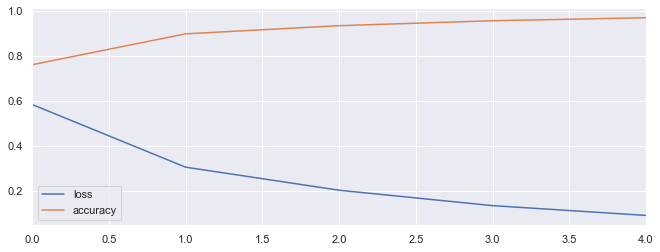

In [62]:
model_CNN_loss = pd.DataFrame(model_Convo.history.history)
model_CNN_loss.plot()

In [63]:
X_test = test_set_check['OriginalTweet'].copy()
y_test = test_set_check['Sentiment'].copy()

In [64]:
test_set.shape

(3798, 6)

In [65]:
X_test = X_test.apply(Data_cleaning)
X_test = tf_token.texts_to_sequences(X_test)

In [66]:
X_test = pad_sequences(X_test, padding='post')